# **Redes Complexas: manipulação de grafos e conceitos fundamentais**

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
Universidade de São Paulo, São Carlos, Brasil.
https://sites.icmc.usp.br/francisco
Copyright: Creative Commons

---

Vamos considerar a biblioteca Networkx. Para a sua instalação, veja: https://networkx.github.io/documentation/stable/install.html

In [1]:
import networkx as nx

Vamos criar um grafo vazio.

In [2]:
G = nx.Graph()

Podemos incluir alguns vértices.

In [3]:
G.add_node('Node1')
G.add_node('Node2')
G.add_node('Node3')
G.add_node('Node4')
G.add_node('Node5')
G.add_node('Node6')

E também algumas arestas:

In [4]:
G.add_edge('Node1','Node2')
G.add_edge('Node2','Node3')
G.add_edge('Node1','Node3')
G.add_edge('Node2','Node4')
G.add_edge('Node3','Node5')
G.add_edge('Node5','Node6')

Visualizando o grafo obtido:

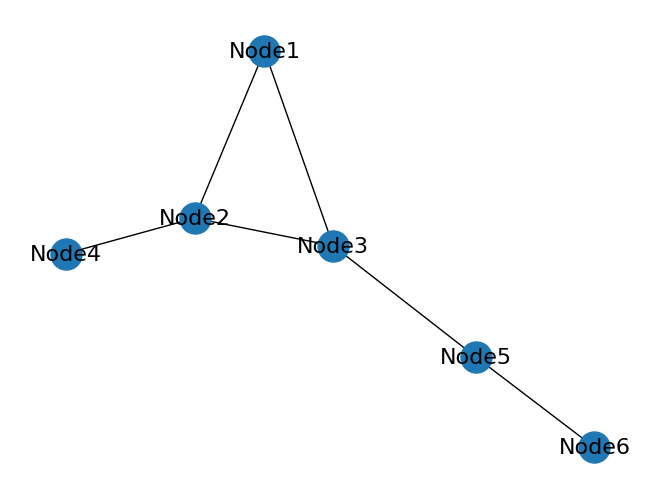

In [5]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Vamos remover as arestas do vértice 1:

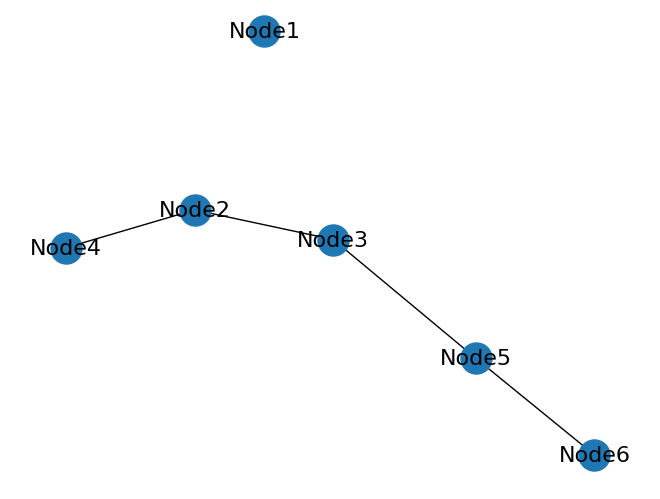

In [6]:
G.remove_edge('Node1','Node2')
G.remove_edge('Node1','Node3')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Podemos remover vértices também:

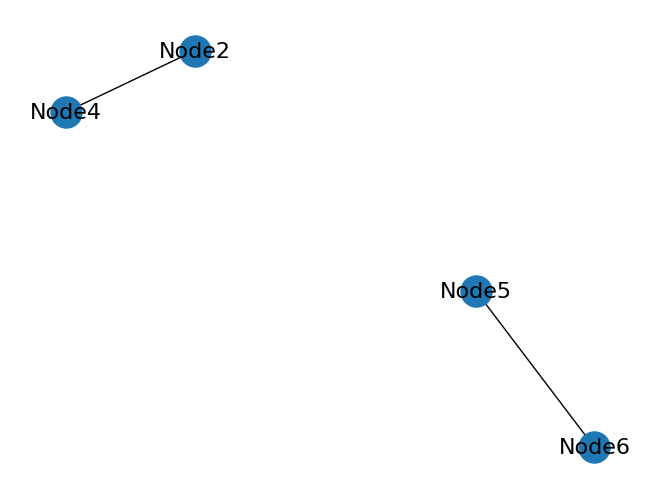

In [7]:
G.remove_node('Node1')
G.remove_node('Node3')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Também podemos criar grafos ponderados:

In [8]:
import networkx as nx
Gw = nx.Graph()

Gw.add_edge('a','b',weight=0.1)
Gw.add_edge('a','c',weight=0.5)
Gw.add_edge('b','c',weight=0.3)
Gw.add_edge('a','d',weight=0.9)

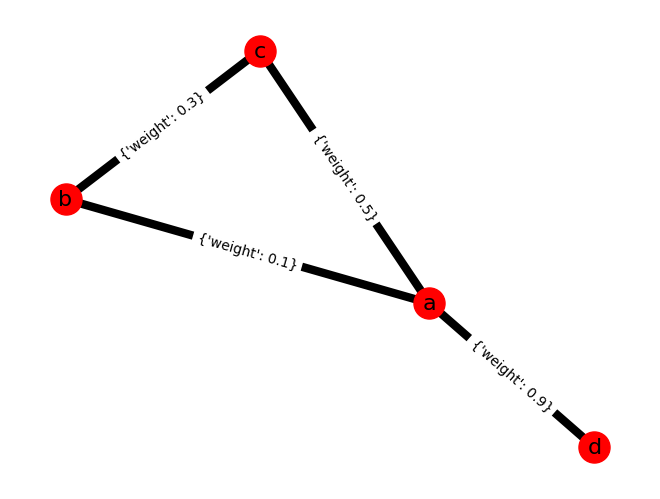

In [9]:
import matplotlib.pyplot as plt

labels = Gw.nodes()
posw=nx.spring_layout(Gw)
nx.draw(Gw, with_labels = True, node_color = 'r', node_size=500, 
        font_size=16, pos=posw, width=6)
# use default edge labels
nx.draw_networkx_edge_labels(Gw,posw)
plt.savefig('graphw.pdf')
plt.show(True)

Adicionando uma nova conexão:

In [10]:
Gw.add_edge(1, 2, weight=4.0 )
Gw.add_edge(1, 'a')

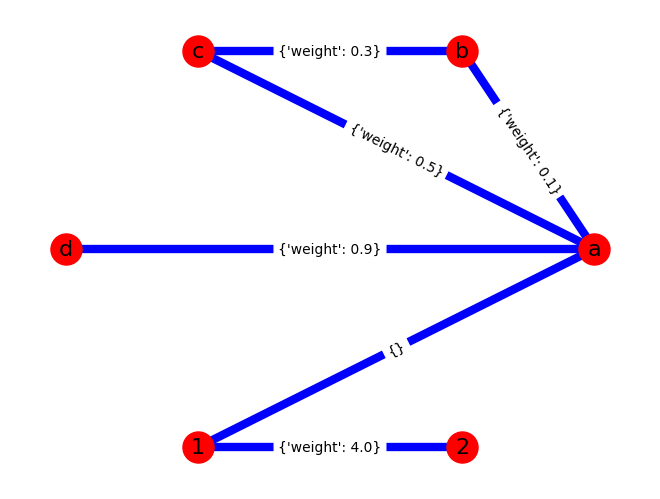

In [11]:
labels = Gw.nodes()
pos=nx.circular_layout(Gw)
nx.draw(Gw, with_labels = True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(Gw,pos)
plt.show(True)

Notem que uma das arestas não apresenta o valor do peso.

## Matriz de adjacências e lista de conexões
Podemos criar o grafo a partir da matriz de adjacências:

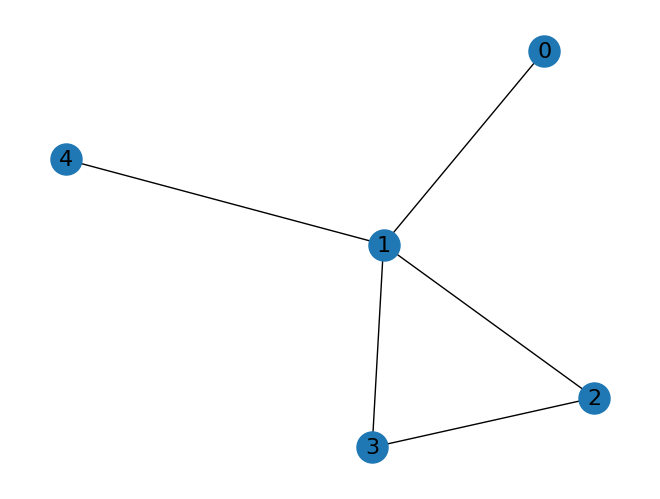

In [17]:
import numpy as np
import networkx as nx

A = np.array([[0,1,0,0,0],[1,0,1,1,1],[0,1,0,1,0],[0,1,0,0,0],[0,1,0,0,0]])
G = nx.from_numpy_array(A)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)

De maneira simular, podemos construir a partir de uma lista de conexões (edge list).

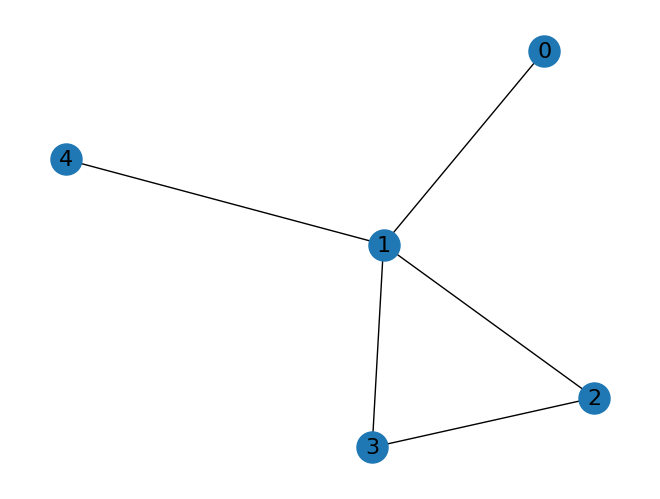

In [18]:
G.clear()
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.Graph(edgelist)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

O grafo pode também apresentar arestas dirigidas:

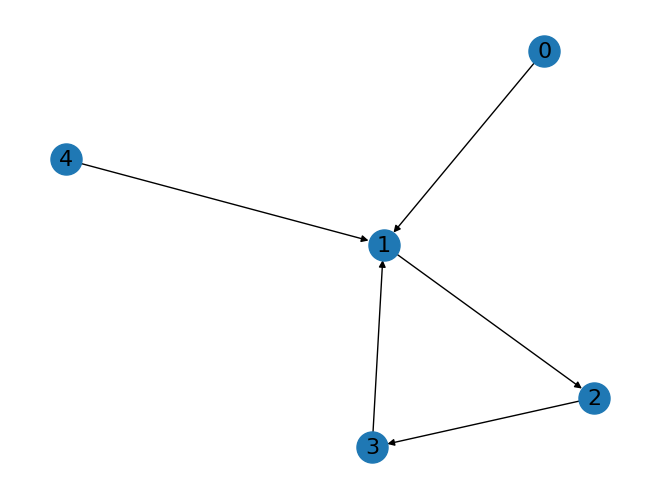

In [19]:
G.clear()
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

# Acesso
Podemos acessar vértices e arestas conforme mostramos a seguir.

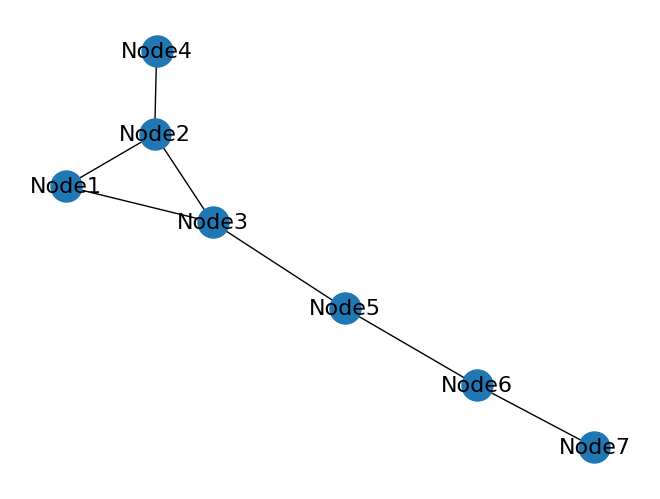

In [20]:
G = nx.Graph()
G.add_node('Node1')
G.add_node('Node2')
G.add_node('Node3')
G.add_node('Node4')
G.add_node('Node5')
G.add_node('Node6')
G.add_edge('Node1','Node2', time = '10pm')
G.add_edge('Node2','Node3')
G.add_edge('Node1','Node3')
G.add_edge('Node2','Node4')
G.add_edge('Node3','Node5')
G.add_edge('Node5','Node6')

G.add_node('Node7', time='5pm')
G.add_edge('Node7','Node6')
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Para acessar um vértice:

In [21]:
print(G.nodes['Node7']) # Python dictionary

{'time': '5pm'}


Para acessar uma aresta particular:

In [23]:
print(G.edges['Node1','Node2']) # Python dictionary

{'time': '10pm'}


Algumas aplicações necessitam iterações entre os vértices e arestas.

In [24]:
for node in G.nodes():
      print('Node:', node)

Node: Node1
Node: Node2
Node: Node3
Node: Node4
Node: Node5
Node: Node6
Node: Node7


Pode ser útil mudar os labels de todos os vértices para valores inteiros, começando com zero.

In [25]:
G= nx.convert_node_labels_to_integers(G, first_label=0)
for node in G.nodes():
      print('Node:', node)

Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Node: 5
Node: 6


Acessando as arestas:

In [26]:
for n1 in G.edges(data=True):
      print(n1)

(0, 1, {'time': '10pm'})
(0, 2, {})
(1, 2, {})
(1, 3, {})
(2, 4, {})
(4, 5, {})
(5, 6, {})


Associando peso às arestas:

In [27]:
for edge in G.edges():
      G[edge[0]][edge[1]]['weight'] = 1.5
# Printing...
for n1 in G.edges(data=True):
      print(n1)

(0, 1, {'time': '10pm', 'weight': 1.5})
(0, 2, {'weight': 1.5})
(1, 2, {'weight': 1.5})
(1, 3, {'weight': 1.5})
(2, 4, {'weight': 1.5})
(4, 5, {'weight': 1.5})
(5, 6, {'weight': 1.5})


# Operadores para grafos
Vamos criar um novo grafo, limpado o anterior.

In [28]:
G.clear()
print(G.nodes())
print(G.edges)

[]
[]


Vamos selecionar um subgrafo da rede do clube the Karate de Zachary. Notem que 'node test' não aparece no grafo, porque esse vértice não existe.

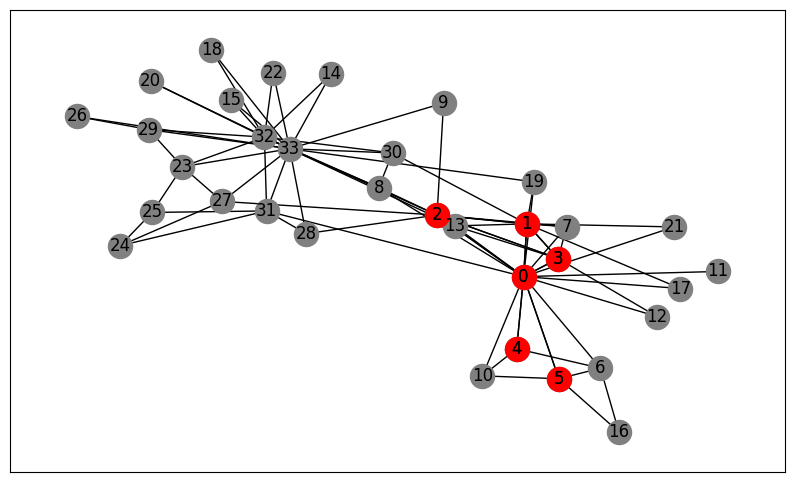

In [29]:
G = nx.karate_club_graph()
subset = [0,1,2,3,4,5, 'node test'] # a set of nodes
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(subset)  
plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
plt.show(True)

Podemos juntar dois grafos usando a operação de união. O comando disjoint_union assume que todos os vértices são diferentes.

Vamos criar dois grafos:

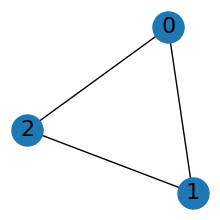

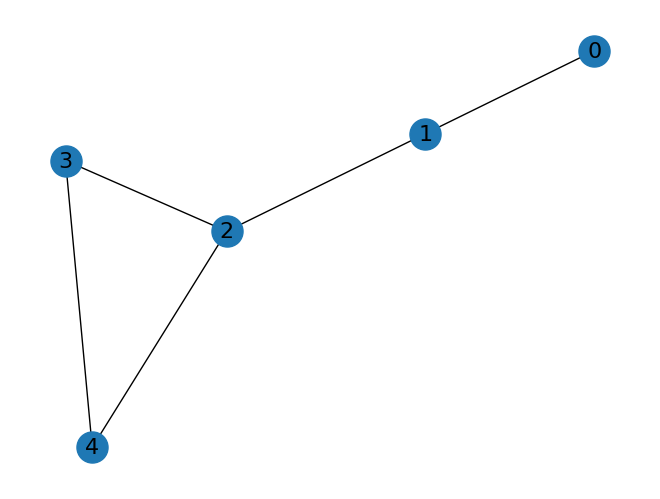

In [30]:
plt.figure(figsize=(2,2))

G0 = nx.Graph([(0,1),(1,2),(2,0)])
nx.draw(G0, with_labels = True, node_size=500, font_size=16)
plt.show(True)

G1 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])
nx.draw(G1, with_labels = True, node_size=500, font_size=16)
plt.show(True)

Aplicando o comando disjoint_union para criar um outro grafo:

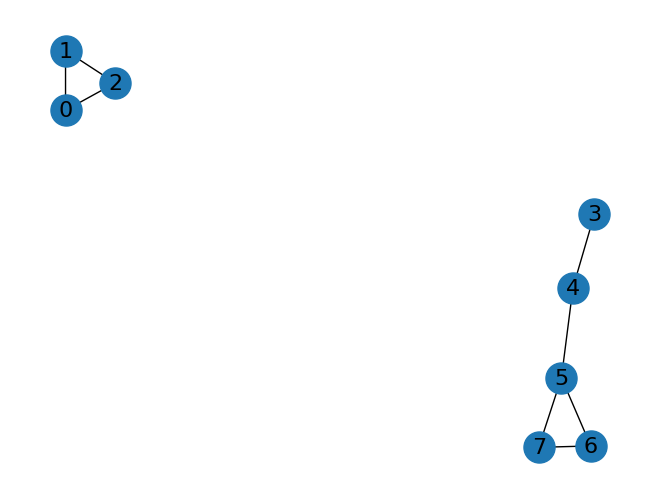

In [31]:
G2 = nx.disjoint_union(G0,G1)
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show(True)

Notem que os labels mudaram e agora o grafo tem 7 vértices.

In [32]:
print('Nodes:', G2.nodes())
print('Edges:', G2.edges())

Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 1), (0, 2), (1, 2), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


Outra opção é fazer uma composição dos grafos. Nesse caso, vértices com o mesmo label em grafos diferenes são consideerados como sendo os mesmos.

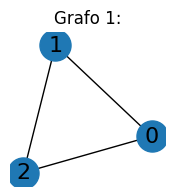

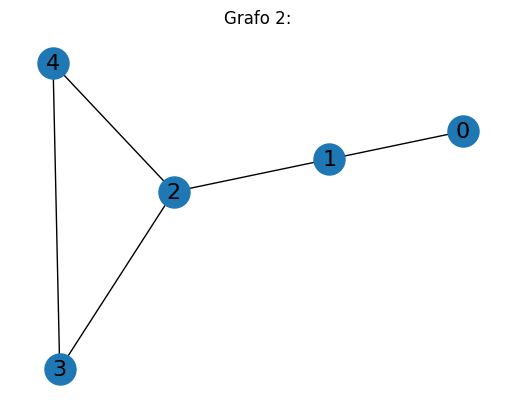

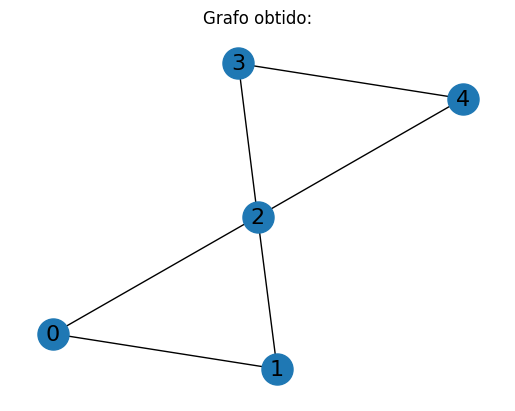

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
G1 = nx.Graph([(0,1),(1,2),(2,0)])
plt.title('Grafo 1:')
nx.draw(G1, with_labels = True, node_size=500, font_size=16)
plt.show(True)

G2 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])
plt.title('Grafo 2:')
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show(True)

G3 = nx.compose(G1,G2)
plt.title('Grafo obtido:')
nx.draw(G3, with_labels = True, node_size=500, font_size=16)
plt.show(True)

# Conversão
Para converter um grafo dirigido (dígrafo) em um grafo sem direção usando a função convert_to_undirected(G).

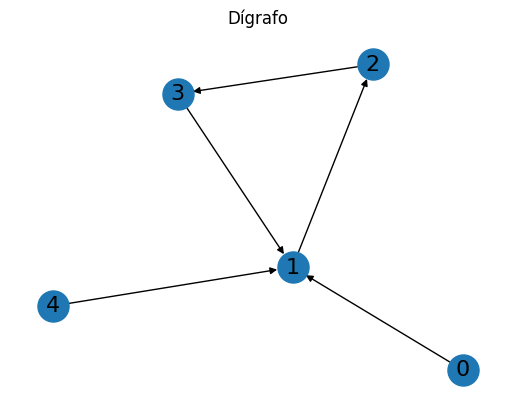

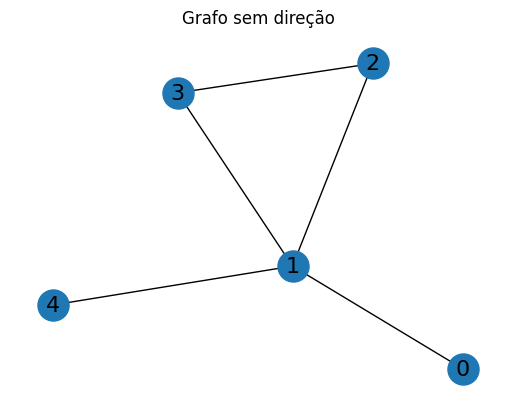

In [34]:
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
pos=nx.spring_layout(G)
plt.title('Dígrafo')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

#grafo sem direção
G = G.to_undirected()
plt.title('Grafo sem direção')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Podemos ainda fazer o inverso, converter um grafo sem direção para um grafo com arestas dirigidas.

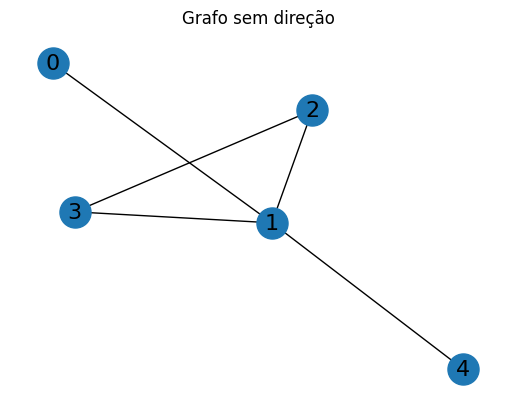

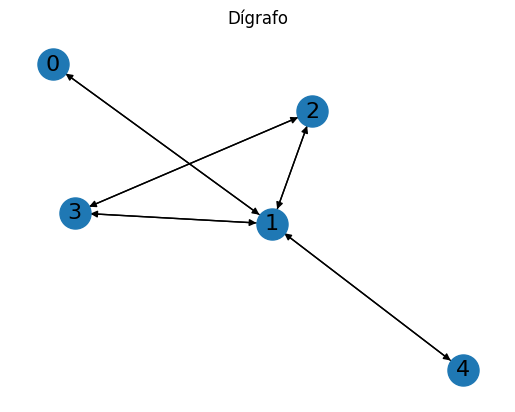

In [35]:
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.Graph(edgelist)
pos=nx.spring_layout(G)
plt.title('Grafo sem direção')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

G = G.to_directed()
plt.title('Dígrafo')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Para converter um grafo ponderado em um grafo cujas arestas não apresentam peso nas conexões:

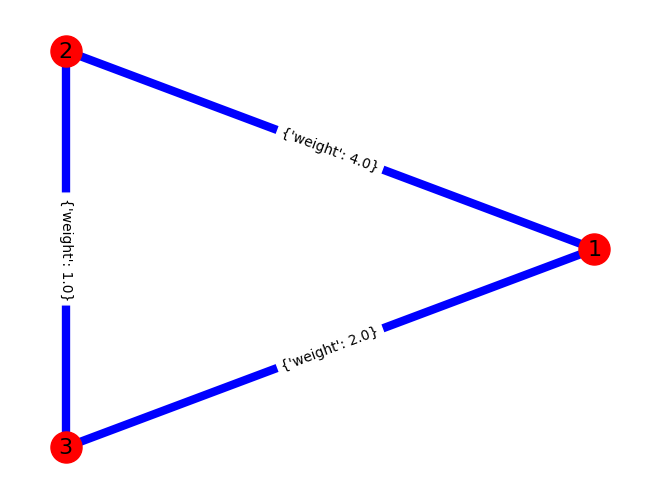

In [36]:
G1.clear()
G1 = nx.Graph()
G1.add_edge(1, 2, weight=4.0 )
G1.add_edge(1, 3, weight=2.0 )
G1.add_edge(2, 3, weight=1.0 )
labels = G1.nodes()
pos=nx.circular_layout(G1)
nx.draw(G1, with_labels = True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(G1,pos)
plt.show(True)

Precisamos definir um limiar, ou seja, um peso mínimo, para o qual arestas cujos pesos sejam maiores do que esse valor sejam mantidas, enquanto que as que apresentarem um valor menor, sejam removidas, removendo o peso de todas a arestas.

In [37]:
min_weight = 1.0
Gnew = nx.Graph()
for (u,v,w) in G1.edges(data=True):
    if w['weight'] > min_weight :
        Gnew.add_edge(u, v, weight=1)

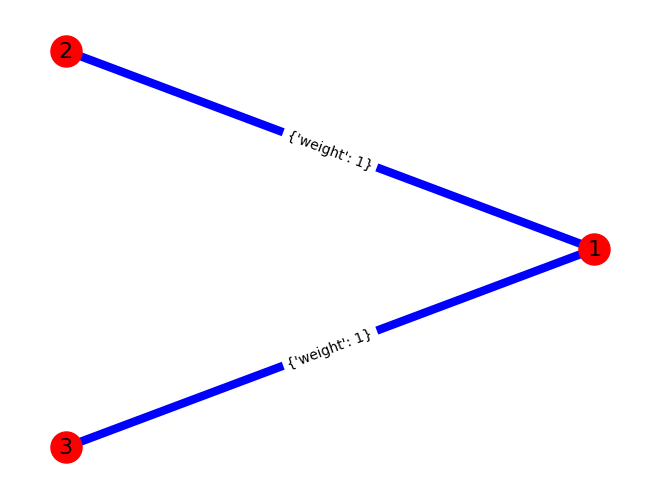

In [38]:
labels = Gnew.nodes()
nx.draw(Gnew, with_labels = True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(Gnew,pos)
plt.show(True)

## Leitura e escrita
Para ler uma rede de um arquivo, usamos o comando: g = nx.read_format(“path/to/file.txt”,...options...) e para escrever em um arquivo: nx.write_format(g,“path/to/file.txt”,...options...).

Vamos inicialmente carregar a rede do clube de Karate que está disponível no Networkx.\

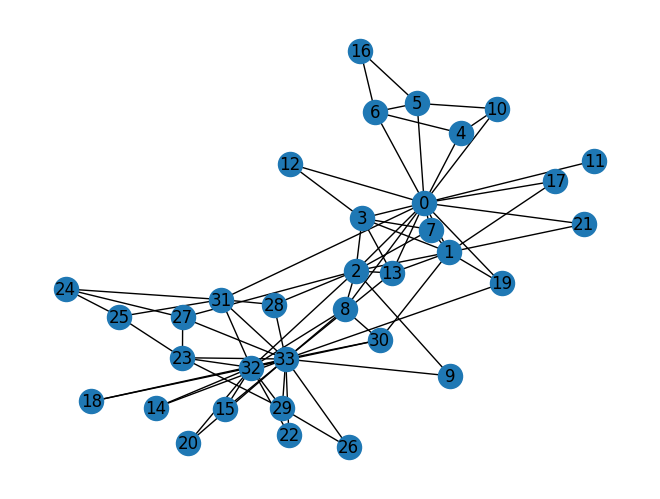

In [39]:
G=nx.karate_club_graph()
nx.draw(G, with_labels = True)
plt.show(True)

Salvando essa rede em um arquivo:

In [40]:
nx.write_edgelist(G, "zachary.txt")

Podemos então fazer a leitura do arquivo e carregar a rede.

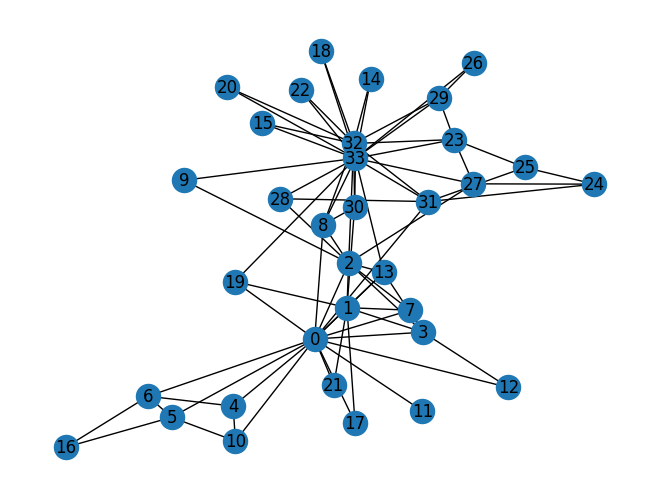

In [41]:
Gnew = nx.read_edgelist("zachary.txt")
nx.draw(Gnew, with_labels = True)
plt.show(True)

Outros formatos também pode ser considerados, como GML, Pajek ou Adjacency Matrix. Uma lista de formatos possíveis pode ser vista no link: https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html

# Componentes
Algumas redes apresentam mais de um componente conectado. Por exemplo:

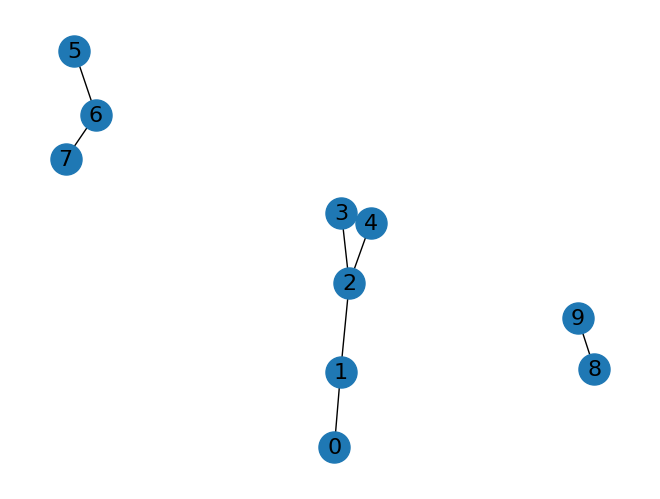

In [42]:
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
pos = nx.fruchterman_reingold_layout(G);
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Para obter os componentes:

In [43]:
Gcc=sorted(nx.connected_components(G), key = len, reverse=True)
print(Gcc[0])
print(Gcc[1])
print(Gcc[2])

{0, 1, 2, 3, 4}
{5, 6, 7}
{8, 9}


Para obter o maior componente, usamos:

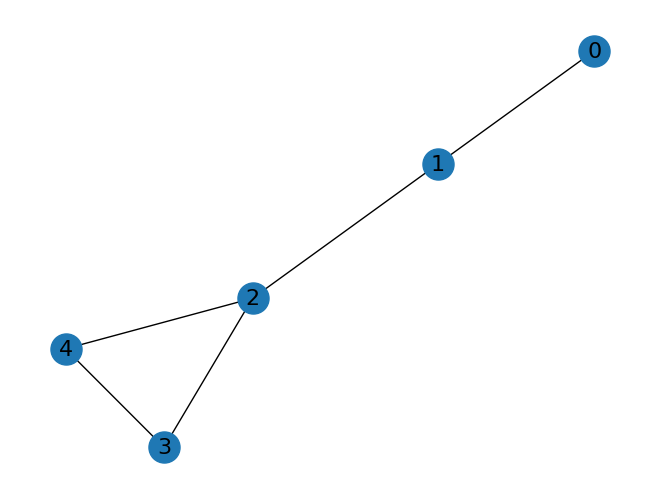

In [44]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.draw(G0, with_labels = True, node_size=500, font_size=16)
plt.show()

Podemos ainda remover arestas de uma rede e manter os vértices.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


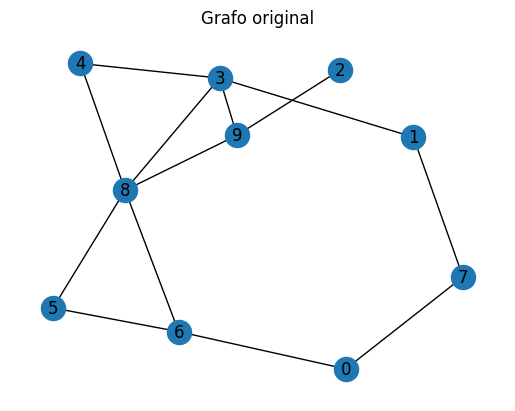

Node removed: 1


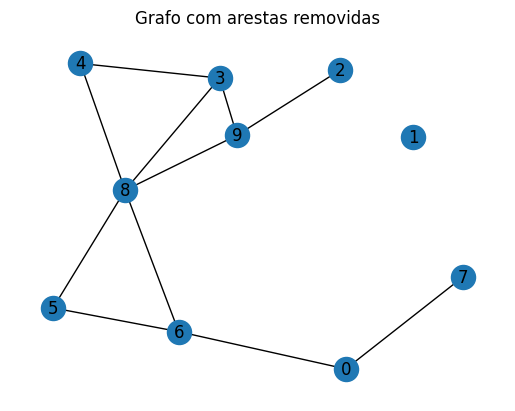

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [45]:
#Edge removal
import numpy as np
import random as random
def remove_node_edges(G, i):
    ng = G.neighbors(i)
    l = []
    for j in ng:
        e = [i,j]
        l.append(e)
    G.remove_edges_from(l)
    
N = 10
p = 0.2
G = nx.gnp_random_graph(N, p, seed=None, directed=False)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G0 = nx.Graph(G0)
print(G0.nodes())
pos = nx.fruchterman_reingold_layout(G0);
plt.title('Grafo original')
nx.draw(G0, pos = pos, with_labels = True)
plt.show()

# remove the edges of a node at random
node = random.choice(np.array(G0.nodes()))
print('Node removed:', node)
remove_node_edges(G0, node)
plt.title('Grafo com arestas removidas')
nx.draw(G0, pos = pos, with_labels = True)
plt.show()
print(G0.nodes())

## Acesso aos vizinhos

Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Vértice selecionado: 16
Vizinhos do vertice selecionado: [5, 6]


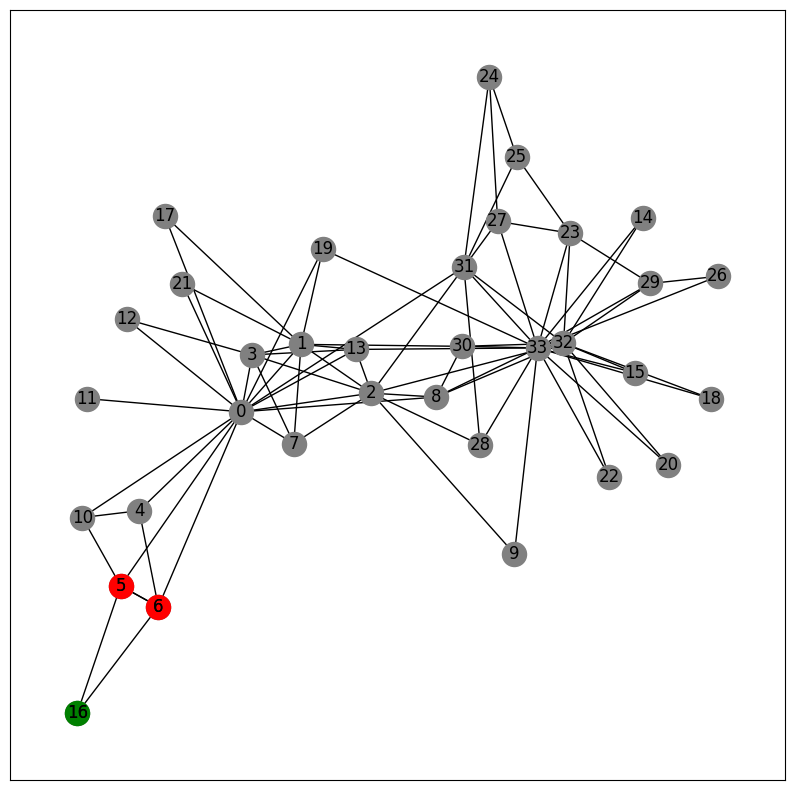

In [46]:
G=nx.karate_club_graph()
print('Vertices:',G.nodes)
node = 16
print('\nVértice selecionado:', node)
print('Vizinhos do vertice selecionado:', list(G.neighbors(node)))

subset = list(G.neighbors(node)) # a set of nodes
pos = nx.spring_layout(G)
k = G.subgraph(subset) 
nodei = G.subgraph(node)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
nx.draw_networkx(nodei, pos=pos, node_color = 'green')
plt.show(True)

Para uma rede carregada a partir de um aquivo:

Vertices: ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']

Vértic

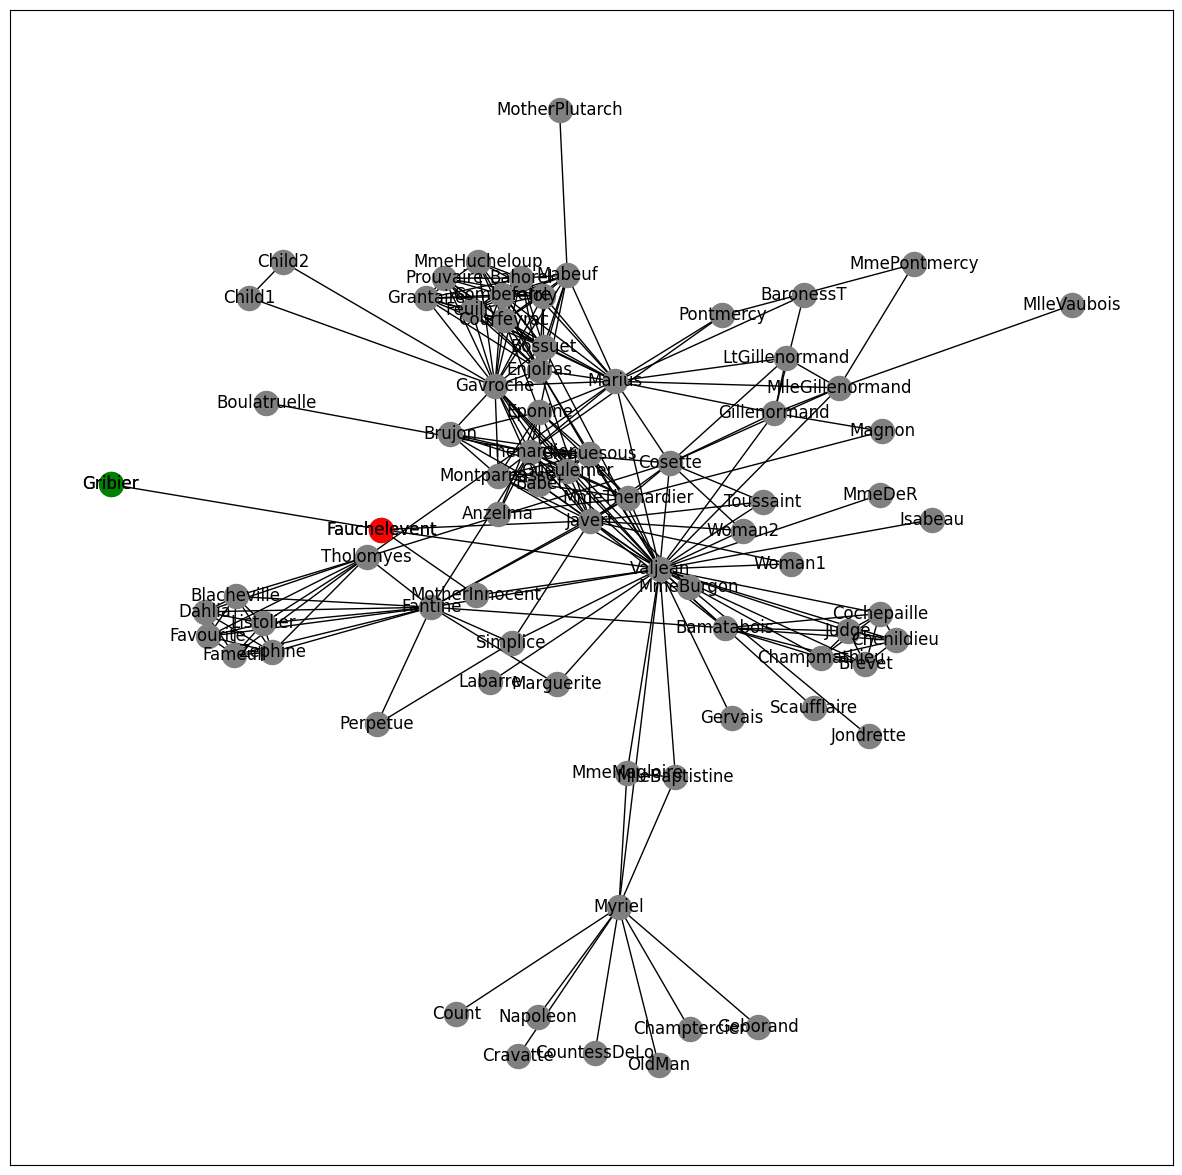

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

G= nx.read_gml("data/lesmis.gml") # Read the network
G = G.to_undirected() #Remove a direcao dos links

print('Vertices:',G.nodes)
node = 'Gribier'
print('\nVértice selecionado:', node)
print('Vizinhos do vertice selecionado:', list(G.neighbors(node)))

subset = list(G.neighbors(node)) # a set of nodes
pos = nx.spring_layout(G)
k = G.subgraph(subset) 
nodei = G.subgraph(node)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
nx.draw_networkx(nodei, pos=pos, node_color = 'green')
plt.show(True)